# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# DEPENDENCIES AND SETUP
import os
import time
import random
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
import numpy as np
from scipy.stats import linregress
from pprint import pprint
from citipy import citipy
from datetime import date
from api_keys import weather_api_key
from api_keys import g_key
import scipy.stats as st

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

## Generate Cities List

In [2]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations and zip into a list of tuples
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination using the Citypy package to return a unique city and country code
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country)

# Combine the two lists into a list of tuples using the zip function
city_country = zip(cities,countries)

# Print the city count to confirm sufficient count ( Greater than 500 )
print(len(cities))

606


In [3]:
list(cities)

['hobart',
 'burns lake',
 'cidreira',
 'upernavik',
 'qaanaaq',
 'moissala',
 'alofi',
 'rikitea',
 'poum',
 'samusu',
 'chumikan',
 'punta arenas',
 'wattegama',
 'najran',
 'georgetown',
 'rosarito',
 'gat',
 'taolanaro',
 'klaksvik',
 'kragujevac',
 'walvis bay',
 'bandarbeyla',
 'chenzhou',
 'vaini',
 'bardiyah',
 'jamestown',
 'albany',
 'bredasdorp',
 'hirara',
 'collie',
 'grand gaube',
 'puerto ayora',
 'kapaa',
 'mahebourg',
 'prieta',
 'nizhniy kuranakh',
 'yalutorovsk',
 'ushuaia',
 'kernersville',
 'mataura',
 'lebu',
 'barentsburg',
 'chuy',
 'mahibadhoo',
 'carnarvon',
 'topolobampo',
 'mar del plata',
 'khatanga',
 'pevek',
 'hermanus',
 'jaisalmer',
 'mbandaka',
 'grand river south east',
 'sitka',
 'avarua',
 'eldorado',
 'antofagasta',
 'san jose',
 'tommot',
 'cabo san lucas',
 'butaritari',
 'illoqqortoormiut',
 'busselton',
 'sorong',
 'severo-kurilsk',
 'alta floresta',
 'port hedland',
 'dikson',
 'tuktoyaktuk',
 'port elizabeth',
 'bambous virieux',
 'mount gam

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# set up lists to hold reponse info
city_id = []
city_name = []
country = []
latitude = []
longitude = []
weather_date = []
temp = []
humidity = []
cloudiness = []
wind_speed = []

# Open file to write results of API calls - success or not into a txt file, as well as all data pulled into a csv
myprintlog = open('weatherAPI_printlog.txt', 'w')
myAPIdata = open('weatherAPI_data.csv', 'w')

# Write header line for csv file
myAPIdata.write("city_id,city_name,country,latitude,longitude,weather_date,temp,humidity,cloudiness,wind_speed\n")

# Loop through the list of tuples of cities,country codes and perform a request for data on each
for city,country_code in city_country:
    query_url = f"{url}appid={weather_api_key}&q={city},{country_code}&units={units}"
    response = requests.get(query_url).json()
    
      # Try to grab the temp,humidity,cloudiness and wind speed if they are available in the Weather API
    # if the city is not found on the WeatherAPI site then the "except" will catch the error and the loop will
    # continue to go through the rest of the city,country_codes in the city_country list
    try:
        # Create variables for each response item and format to desired datatype
        cityID = int(response['id'])
        cityName = response['name']
        countryCode = response['sys']['country']
        lat_val = response['coord']['lat']
        lon_val = response['coord']['lon']
        weatherDate = (datetime.fromtimestamp(response['dt'])).strftime('%m/%d/%y')
        temperature = response['main']['temp']
        humidity_val = response['main']['humidity']
        cloudiness_val = response['clouds']['all']
        windSpeed = response['wind']['speed']
        
        # Append retreived values to lists above using the variables created above
        city_id.append(cityID)
        city_name.append(cityName)
        country.append(countryCode)
        latitude.append(lat_val)
        longitude.append(lon_val)
        weather_date.append(weatherDate)
        temp.append(temperature)
        humidity.append(humidity_val)
        cloudiness.append(cloudiness_val)
        wind_speed.append(windSpeed)
        
        # Output line to terminal to mark progress and store it to a print log text file
        print(f"{cityName} with city ID:{cityID} was found in the Weathermap API\n")
        myprintlog.write(f"{cityName} with city ID:{cityID} was found in the Weathermap API\n")
        
        # Output all retreived values to a csv file
        myAPIdata.write(f"{cityID},{cityName},{countryCode},{lat_val},{lon_val},{weatherDate},\
            {temperature},{humidity_val},{cloudiness_val},{windSpeed}\n")
        
    # Handle exceptions for a city that is not available in the Weather API
    except:
        
        print(f"{city},{country_code} was not found in the Weathermap API\n")
        myprintlog.write(f"{city},{country_code} was not found in the Weathermap API\n")
        
        # Append null values so lists are all the same length (later we will remove nulls from dataframe)
        city_id.append(None)
        city_name.append(None)
        country.append(None)
        latitude.append(None)
        longitude.append(None)
        weather_date.append(None)
        temp.append(None)
        humidity.append(None)
        cloudiness.append(None)
        wind_speed.append(None)
        pass
    
# Close the file handle after completion of the loop
myprintlog.close()
myAPIdata.close()

hobart,au was not found in the Weathermap API

burns lake,ca was not found in the Weathermap API

cidreira,br was not found in the Weathermap API

upernavik,gl was not found in the Weathermap API

qaanaaq,gl was not found in the Weathermap API

moissala,td was not found in the Weathermap API

alofi,nu was not found in the Weathermap API

rikitea,pf was not found in the Weathermap API

poum,nc was not found in the Weathermap API

samusu,ws was not found in the Weathermap API

chumikan,ru was not found in the Weathermap API

punta arenas,cl was not found in the Weathermap API

wattegama,lk was not found in the Weathermap API

najran,sa was not found in the Weathermap API

georgetown,sh was not found in the Weathermap API

rosarito,mx was not found in the Weathermap API

gat,ly was not found in the Weathermap API

taolanaro,mg was not found in the Weathermap API

klaksvik,fo was not found in the Weathermap API

kragujevac,rs was not found in the Weathermap API

walvis bay,na was not found

nanortalik,gl was not found in the Weathermap API

ucluelet,ca was not found in the Weathermap API

illapel,cl was not found in the Weathermap API

dingle,ie was not found in the Weathermap API

salalah,om was not found in the Weathermap API

thompson,ca was not found in the Weathermap API

burla,ru was not found in the Weathermap API

micomeseng,gq was not found in the Weathermap API

milingimbi,au was not found in the Weathermap API

lambarene,ga was not found in the Weathermap API

merta,in was not found in the Weathermap API

attawapiskat,ca was not found in the Weathermap API

ladario,br was not found in the Weathermap API

norman wells,ca was not found in the Weathermap API

whitefish,us was not found in the Weathermap API

nikolskoye,ru was not found in the Weathermap API

guerrero negro,mx was not found in the Weathermap API

barrow,us was not found in the Weathermap API

san patricio,mx was not found in the Weathermap API

lorengau,pg was not found in the Weathermap API

abonn

puerto leguizamo,co was not found in the Weathermap API

shingu,jp was not found in the Weathermap API

saryshagan,kz was not found in the Weathermap API

matara,lk was not found in the Weathermap API

victoria,sc was not found in the Weathermap API

buzovna,az was not found in the Weathermap API

chastoozerye,ru was not found in the Weathermap API

catano,us was not found in the Weathermap API

sfantu gheorghe,ro was not found in the Weathermap API

katangli,ru was not found in the Weathermap API

narsaq,gl was not found in the Weathermap API

namatanai,pg was not found in the Weathermap API

kungurtug,ru was not found in the Weathermap API

talcahuano,cl was not found in the Weathermap API

kodiak,us was not found in the Weathermap API

napasar,in was not found in the Weathermap API

temir,kz was not found in the Weathermap API

raymondville,us was not found in the Weathermap API

broken hill,au was not found in the Weathermap API

kalianget,id was not found in the Weathermap API

so

macheng,cn was not found in the Weathermap API

constitucion,mx was not found in the Weathermap API

port-cartier,ca was not found in the Weathermap API

udachnyy,ru was not found in the Weathermap API

ugoofaaru,mv was not found in the Weathermap API

tucurui,br was not found in the Weathermap API

ikon-khalk,ru was not found in the Weathermap API

villanueva,co was not found in the Weathermap API

padang,id was not found in the Weathermap API

karasjok,no was not found in the Weathermap API

ituni,gy was not found in the Weathermap API

suoyarvi,ru was not found in the Weathermap API

shimanovsk,ru was not found in the Weathermap API

kroya,id was not found in the Weathermap API

puno,pe was not found in the Weathermap API

sadovoye,ru was not found in the Weathermap API

tolaga bay,nz was not found in the Weathermap API

richards bay,za was not found in the Weathermap API

tijara,in was not found in the Weathermap API

colares,pt was not found in the Weathermap API

saint anthony,ca

In [7]:
url="http://api.openweathermap.org/data/2.5/weather?"
units="imperial"
query_url = url + "appid=" + weather_api_key + "&units=" + units+"&q="
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=142612d839f8c44c5f7b93d286aea075&units=imperial&q=


In [8]:
# SELECT 500 UNIQUE CITIES AND SAVE THE DATA INTO DFSELECTED.CSV 
city_name = []
lat = []
long = []
temp = []
humdity = []
wind_speed = []
cloudiness = []
num = 1

for city in cities: 
    try: 
        data = (requests.get(query_url + city)).json()
        city_name.append(data["name"])
        lat.append(data["coord"]["lat"])
        long.append(data["coord"]["lon"])
        temp.append(data["main"]["temp"])
        humdity.append(data["main"]["humidity"]) 
        wind_speed.append(data["wind"]["speed"]) 
        cloudiness.append(data["clouds"]["all"])
        num = num + 1
    except KeyError:
        num = num + 1   
                

In [9]:
df=pd.DataFrame({
    "City": city_name,
    "lat": lat,
    "lon": long,
    "temp_F": temp,
    "humidity": humdity,
    "cloudiness": cloudiness,
    "wind_mph": wind_speed
})
df=df.head(500)
df

,City,lat,lon,temp_F,humidity,cloudiness,wind_mph
0,Hobart,-42.88,147.33,40.35,83,90,17.22
1,Burns Lake,54.23,-125.75,50.32,53,8,10.00
2,Cidreira,-30.18,-50.21,65.07,90,84,18.48
3,Upernavik,72.79,-56.15,29.55,91,100,4.72
4,Qaanaaq,77.48,-69.36,14.36,80,6,6.20
...,...,...,...,...,...,...,...
495,Lafia,8.48,8.52,72.95,94,88,4.14
496,Qaqortoq,60.72,-46.03,44.60,48,40,4.70
497,Wheeling,42.14,-87.93,70.45,73,90,14.99
498,Neuquén,-38.95,-68.06,60.80,48,90,13.87


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
# Convert array of JSONs into Pandas DataFrame

weather_dict = {"City": city_name,
                "Latitude":lat,
                "Longitude":long,
                "Max Temp":temp,
              "Humidity":humdity,
               "Cloudiness":cloudiness,
              "Wind Speed":wind_speed,
              # "Country":country,
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hobart,-42.88,147.33,40.35,83,90,17.22
1,Burns Lake,54.23,-125.75,50.32,53,8,10.00
2,Cidreira,-30.18,-50.21,65.07,90,84,18.48
3,Upernavik,72.79,-56.15,29.55,91,100,4.72
4,Qaanaaq,77.48,-69.36,14.36,80,6,6.20


In [11]:
# Export the City_Data into a csv
weather_data.to_csv(r'output_data/my_weather_data.csv')
# Show Record Count
countforme = len(weather_data)
countforme

565

In [12]:
# Display the City Data Frame
weather_data.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hobart,-42.88,147.33,40.35,83,90,17.22
1,Burns Lake,54.23,-125.75,50.32,53,8,10.00
2,Cidreira,-30.18,-50.21,65.07,90,84,18.48
3,Upernavik,72.79,-56.15,29.55,91,100,4.72
4,Qaanaaq,77.48,-69.36,14.36,80,6,6.20


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [13]:
# Get the indices of cities that have humidity over 100%.


In [14]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

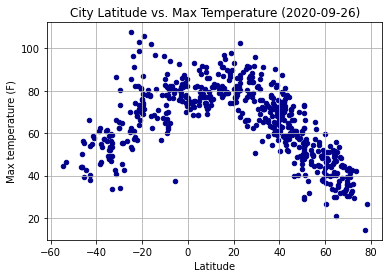

In [15]:
# LATITUDE VERSUS TEMPERATURE PLOT
weather_data.plot(kind='scatter', x='Latitude', y='Max Temp', c='DarkBlue')
plt.title('City Latitude vs. Max Temperature ({})'.format(date.today()))
plt.xlabel('Latitude')
plt.ylabel('Max temperature (F)')
plt.grid()
plt.savefig("Images/LatitudeVsTemperature.png")

## Latitude vs. Humidity Plot

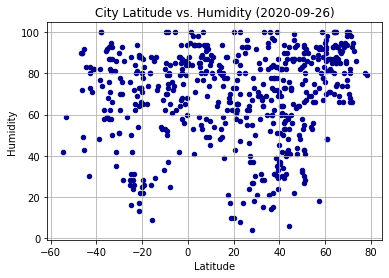

In [16]:
# LATITUDE VERSUS HUMIDITY PLOT
weather_data.plot(kind='scatter', x='Latitude', y='Humidity', c='DarkBlue')
plt.title('City Latitude vs. Humidity ({})'.format(date.today()))
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid()
plt.savefig("Images/LatitudeVsHumidity.png")

## Latitude vs. Cloudiness Plot

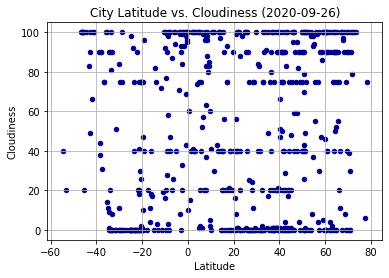

In [17]:
# LATITUDE VERSUS CLOUDINESS PLOT
weather_data.plot(kind='scatter', x='Latitude', y='Cloudiness', c='DarkBlue')
plt.title('City Latitude vs. Cloudiness ({})'.format(date.today()))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid()
plt.savefig("Images/LatitudeVsCloudiness.png")

## Latitude vs. Wind Speed Plot

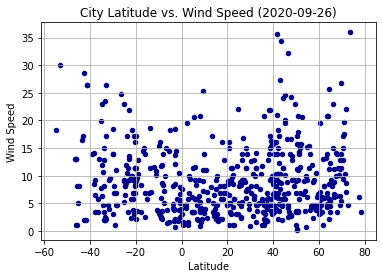

In [18]:
# LATITUDE VERSUS WIND SPEED PLOT
weather_data.plot(kind='scatter', x='Latitude', y='Wind Speed', c='DarkBlue')
plt.title('City Latitude vs. Wind Speed ({})'.format(date.today()))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()
plt.savefig("Images/LatitudeVsWind Speed.png")

In [19]:
# Create Northern and Southern Hemisphere DataFrames
northlat_df = weather_data.loc[weather_data["Latitude"] >= 0,:]
southlat_df = weather_data.loc[weather_data["Latitude"] < 0,:]

northlat_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed
1,Burns Lake,54.23,-125.75,50.32,53,8,10.00
3,Upernavik,72.79,-56.15,29.55,91,100,4.72
4,Qaanaaq,77.48,-69.36,14.36,80,6,6.20
5,Moïssala,8.34,17.77,71.49,92,100,1.54
9,Chumikan,54.72,135.31,49.15,88,93,6.20


## Linear Regression

In [28]:
# Define plotting function

def plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos,ifig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    print(f"The r-squared is: {rvalue}")
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(xdata,ydata)
    plt.plot(xdata,regress_values,"r-")
    plt.annotate(line_eq,lblpos,fontsize=15,color="red")
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.savefig(f"output_data/fig{ifig}.png")
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8253848116032908


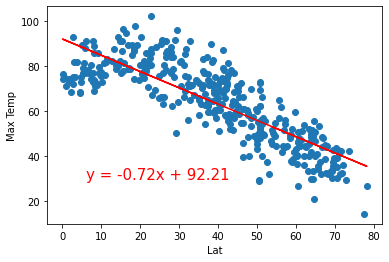

In [29]:
x_values = northlat_df["Latitude"]
y_values = northlat_df["Max Temp"]
plotLinearRegression(x_values,y_values,'Lat','Max Temp',(6,30),"latvmaxtemp")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6587583937605594


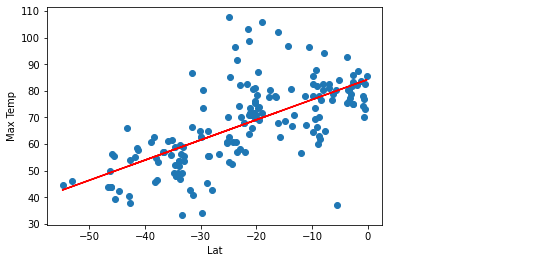

In [30]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression
x_values = southlat_df["Latitude"]
y_values = southlat_df["Max Temp"]
plotLinearRegression(x_values,y_values,'Lat','Max Temp',(6,30),"latvmaxtemp")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.13417952271564487


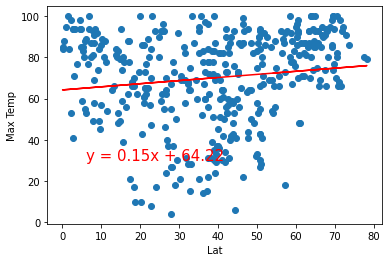

In [31]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = northlat_df["Latitude"]
y_values = northlat_df["Humidity"]
plotLinearRegression(x_values,y_values,'Lat','Max Temp',(6,30),"lathumdity")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.00983134756529233


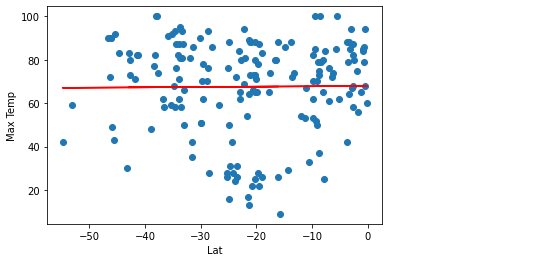

In [32]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = southlat_df["Latitude"]
y_values = southlat_df["Humidity"]
plotLinearRegression(x_values,y_values,'Lat','Max Temp',(6,30),"lathumdity")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.09334120054250797


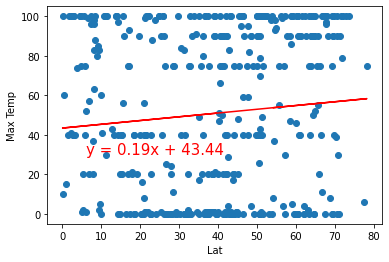

In [26]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = northlat_df["Latitude"]
y_values = northlat_df["Cloudiness"]
plotLinearRegression(x_values,y_values,'Lat','Max Temp',(6,30),"latcloudiness")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.09143002601684014


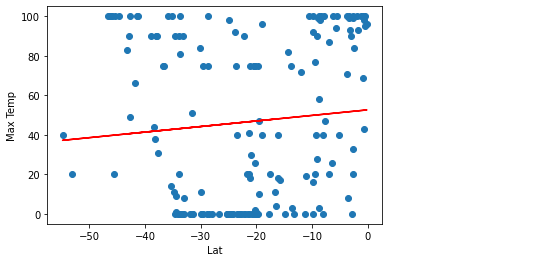

In [33]:
# Sourhern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = southlat_df["Latitude"]
y_values = southlat_df["Cloudiness"]
plotLinearRegression(x_values,y_values,'Lat','Max Temp',(6,30),"latcloudiness")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.2110847265641172


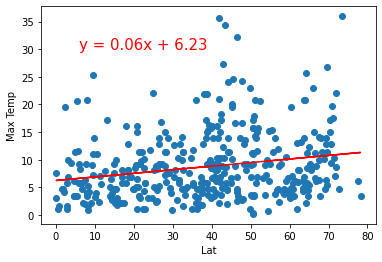

In [34]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
xlbl = "Lat"
x_values = northlat_df["Latitude"]
y_values = northlat_df["Wind Speed"]
plotLinearRegression(x_values,y_values,'Lat','Max Temp',(6,30),"latwind_speed")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.2637521041074841


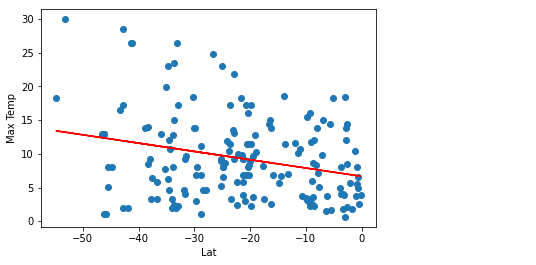

In [35]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x_values = southlat_df["Latitude"]
y_values = southlat_df["Wind Speed"]
plotLinearRegression(x_values,y_values,'Lat','Max Temp',(6,30),"latwind_speed")